# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 3000)
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# importing ploting libraries
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [457]:
cancer_df = pd.read_csv('breast-cancer-wisconsin-data.csv')
cancer_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [458]:
  # Id columns is to identify rows hence can be skipped in analysis
cancer_df.drop('ID',axis=1)
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [459]:
print('dtypes:')
print(cancer_df.dtypes)
print('-----------')
print('shape:',cancer_df.shape)

dtypes:
ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object
-----------
shape: (699, 11)


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [460]:
# We could see "?" values in column, this should be removed from data set
print(cancer_df['Bare Nuclei'].value_counts())
# Check for missing value in any other column

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64


In [461]:
modcancer_df = cancer_df.apply(lambda x: print(x.value_counts()))
print(modcancer_df)
print('from above result we can conclude that Bare Nuclei column having non numeric value')

1182404     6
1276091     5
1198641     3
1061990     2
1240603     2
1277792     2
1354840     2
695091      2
822829      2
411453      2
734111      2
1174057     2
560680      2
654546      2
1218860     2
385103      2
1158247     2
320675      2
1339781     2
897471      2
1293439     2
1017023     2
704097      2
1320077     2
1299596     2
1100524     2
1070935     2
1033078     2
1105524     2
1115293     2
1168736     2
1143978     2
769612      2
1173347     2
733639      2
1321942     2
798429      2
493452      2
466906      2
1116192     2
1114570     2
1238777     2
1171710     2
1299924     2
1116116     2
1212422     2
806423      1
1171795     1
1311033     1
763235      1
1368267     1
1204558     1
1186936     1
1311875     1
1246562     1
1257200     1
1365328     1
1219859     1
1232225     1
1267898     1
1277268     1
434518      1
1257815     1
1222936     1
1213784     1
1268275     1
1240337     1
1230175     1
657753      1
1369821     1
1223003     1
776715

Name: ID, dtype: int64
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: ClumpThickness, dtype: int64
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: Cell Size, dtype: int64
1     353
2      59
10     58
3      56
4      44
5      34
7      30
6      30
8      28
9       7
Name: Cell Shape, dtype: int64
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: Marginal Adhesion, dtype: int64
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: Single Epithelial Cell Size, dtype: int64
1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
Name: Normal Nucleoli, dtype: int64
1     443
10     

In [462]:
#Checking other column for missing value
print(cancer_df['Marginal Adhesion'].value_counts().sum())


699


In [463]:
#checking for any null value
print(cancer_df.isnull().sum())
print('It seems that our data has no missing value')

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64
It seems that our data has no missing value


In [464]:
#Checking for duplicate data
print(cancer_df[cancer_df.duplicated()])
print('we found these many duplicate rows. now we are going to drop these')

          ID  ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
208  1218860               1          1           1                  1   
253  1100524               6         10          10                  2   
254  1116116               9         10          10                  1   
258  1198641               3          1           1                  1   
272   320675               3          3           5                  2   
338   704097               1          1           1                  1   
561  1321942               5          1           1                  1   
684   466906               1          1           1                  1   

     Single Epithelial Cell Size Bare Nuclei  Normal Nucleoli  \
208                            1           1                3   
253                            8          10                7   
254                           10           8                3   
258                            2           1                3   
272     

In [465]:
#droping duplicate rows
cancer_df.drop_duplicates(keep='first',inplace = True)
cancer_df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.910000e+02,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,1.073333e+06,4.426918,3.130246,3.201158,2.824891,3.211288,3.435601,2.882779,1.593343,2.688857
std,6.192953e+05,2.815861,3.041328,2.959886,2.866552,2.199852,2.442345,3.066298,1.723129,0.951051
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.725490e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238437e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [466]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
#modCancer_df = cancer_df[cancer_df['Bare Nuclei'] != '?']
#modCancer_df.shape
cancer_df['Bare Nuclei'] = cancer_df['Bare Nuclei'].apply(lambda x: np.where(x.isdigit(),x,'0'))
cancer_df.loc[cancer_df['Bare Nuclei'] == '?','Bare Nuclei'] = cancer_df['Bare Nuclei'].median()
cancer_df.shape

(691, 11)

In [467]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [468]:
# Check for correlation of variable
cancer_df.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.059165,-0.043273,-0.042184,-0.066230,-0.047642,-0.059645,-0.054001,-0.036001,-0.079459
ClumpThickness,-0.059165,1.000000,0.643340,0.653752,0.487949,0.517448,0.561076,0.535712,0.350354,0.716938
Cell Size,-0.043273,0.643340,1.000000,0.905420,0.713117,0.747111,0.759525,0.727239,0.460064,0.817720
Cell Shape,-0.042184,0.653752,0.905420,1.000000,0.690989,0.714393,0.738455,0.724693,0.440592,0.817693
Marginal Adhesion,-0.066230,0.487949,0.713117,0.690989,1.000000,0.608477,0.669813,0.602453,0.417167,0.701371
Single Epithelial Cell Size,-0.047642,0.517448,0.747111,0.714393,0.608477,1.000000,0.620518,0.634058,0.482644,0.681233
Normal Nucleoli,-0.059645,0.561076,0.759525,0.738455,0.669813,0.620518,1.000000,0.669059,0.343821,0.756618
Bland Chromatin,-0.054001,0.535712,0.727239,0.724693,0.602453,0.634058,0.669059,1.000000,0.427644,0.715540
Mitoses,-0.036001,0.350354,0.460064,0.440592,0.417167,0.482644,0.343821,0.427644,1.000000,0.424111
Class,-0.079459,0.716938,0.817720,0.817693,0.701371,0.681233,0.756618,0.715540,0.424111,1.000000


In [469]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [470]:
#Let us check for pair plots
cancer_df['Bare Nuclei'] = cancer_df['Bare Nuclei'].astype(int)
cancer_df.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int32
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

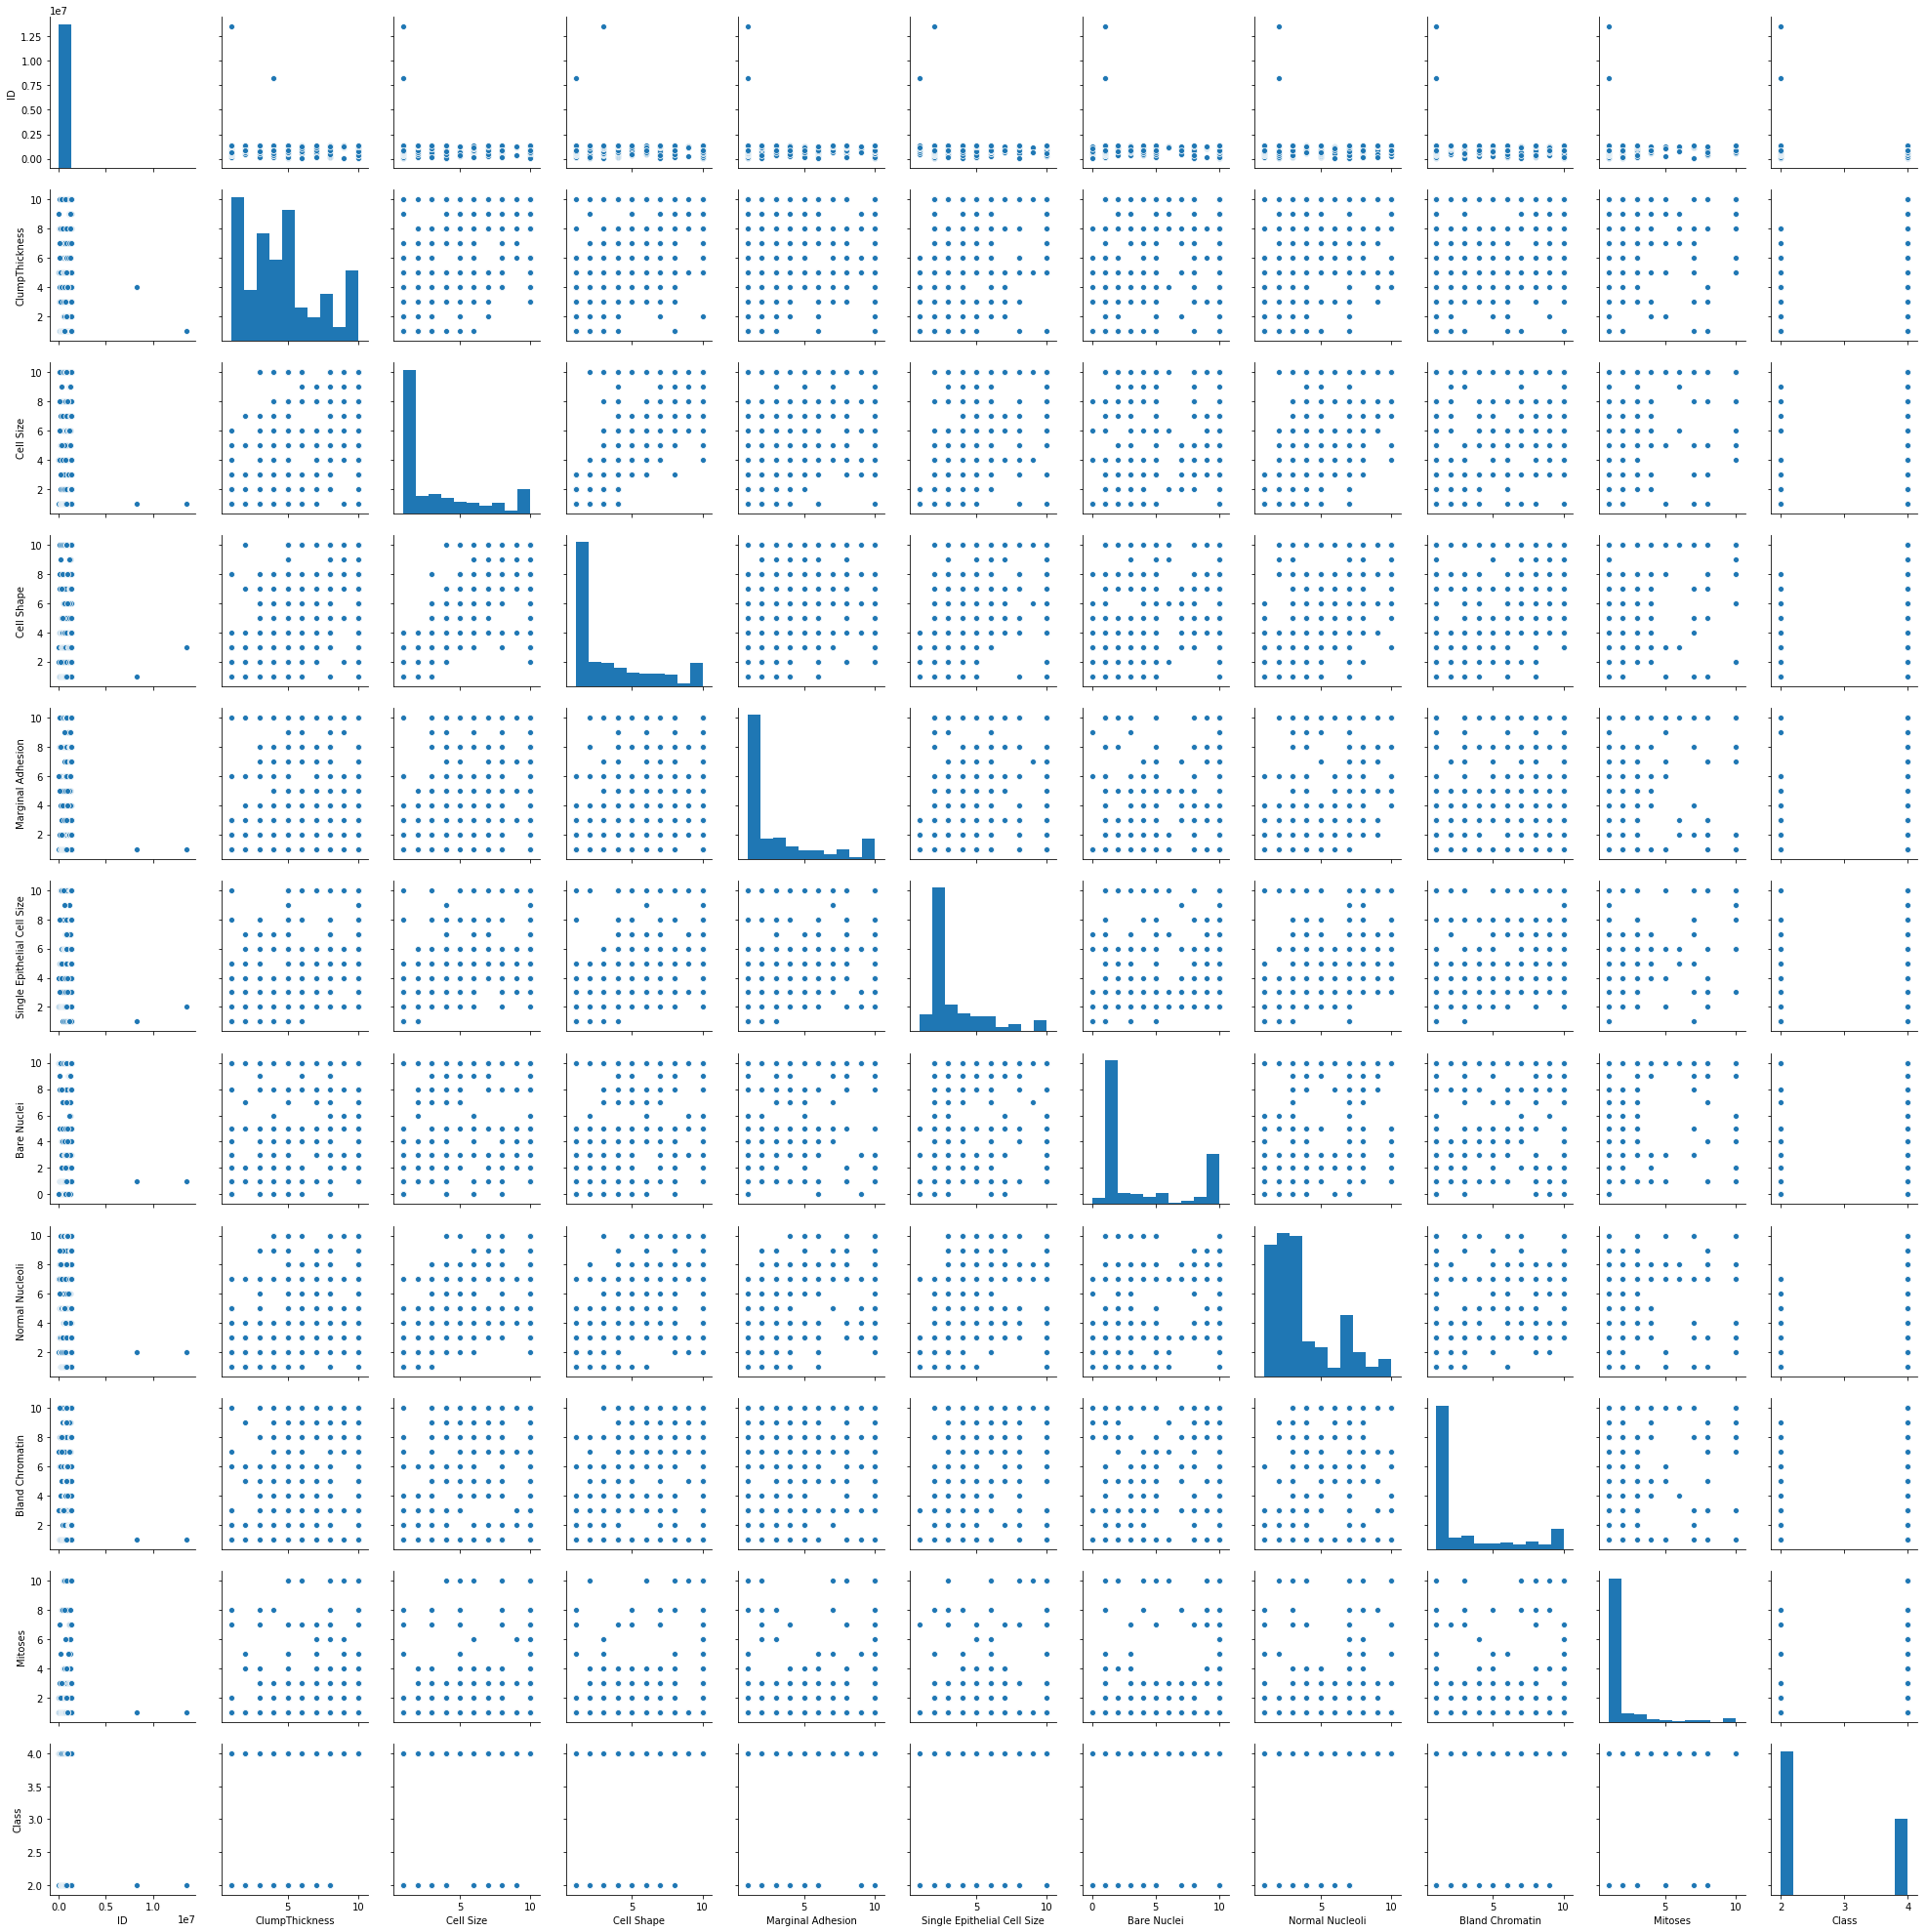

In [471]:
sns.pairplot(cancer_df)

In [472]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [473]:
modCancer_df = cancer_df.drop('ID',axis=1)

In [474]:
modCancer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,691.0,4.426918,2.815861,1.0,2.0,4.0,6.0,10.0
Cell Size,691.0,3.130246,3.041328,1.0,1.0,1.0,5.0,10.0
Cell Shape,691.0,3.201158,2.959886,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,691.0,2.824891,2.866552,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,691.0,3.211288,2.199852,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,691.0,3.455861,3.634657,0.0,1.0,1.0,5.0,10.0
Normal Nucleoli,691.0,3.435601,2.442345,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,691.0,2.882779,3.066298,1.0,1.0,1.0,4.0,10.0
Mitoses,691.0,1.593343,1.723129,1.0,1.0,1.0,1.0,10.0
Class,691.0,2.688857,0.951051,2.0,2.0,2.0,4.0,4.0


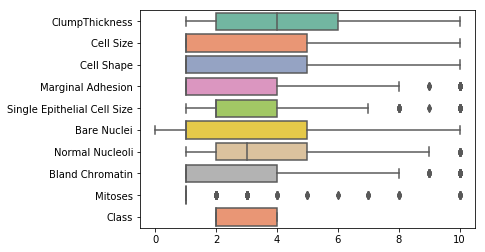

In [475]:
#fig = plt.figure(1, figsize=(9, 6))
ax = sns.boxplot(data = modCancer_df,orient='h',palette = "Set2")

In [476]:
print('Outlier for Marginal Adhesion is being replaced')
#updatedCancer_df['Marginal Adhesion'].value_counts().sort_index()
pd.crosstab(modCancer_df['Marginal Adhesion'],modCancer_df['Class'])

Outlier for Marginal Adhesion is being replaced


Class,2,4
Marginal Adhesion,,
1,370,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [477]:
modCancer_df['Marginal Adhesion']=np.where(modCancer_df['Marginal Adhesion']>7,7,modCancer_df['Marginal Adhesion'])

print(pd.crosstab(modCancer_df['Marginal Adhesion'],modCancer_df['Class']))
print('------------------')

Class                2   4
Marginal Adhesion         
1                  370  31
2                   37  19
3                   31  27
4                    5  28
5                    4  19
6                    4  18
7                    2  96
------------------


In [478]:
print('Outlier for Single Epithelial Cell Size is being replaced')
pd.crosstab(modCancer_df['Single Epithelial Cell Size'],modCancer_df['Class'])

Outlier for Single Epithelial Cell Size is being replaced


Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,360,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [479]:
modCancer_df['Single Epithelial Cell Size']=np.where(modCancer_df['Single Epithelial Cell Size']>7,7,modCancer_df['Single Epithelial Cell Size'])

print(pd.crosstab(modCancer_df['Single Epithelial Cell Size'],modCancer_df['Class']))
print('------------------')

Class                          2   4
Single Epithelial Cell Size         
1                             44   1
2                            360  23
3                             29  42
4                              7  41
5                              5  34
6                              2  39
7                              6  58
------------------


In [480]:
print('Outlier for Normal Nucleoli is being Replaced')
pd.crosstab(modCancer_df['Normal Nucleoli'],modCancer_df['Class'])

Outlier for Normal Nucleoli is being Replaced


Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,126,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


In [481]:
modCancer_df['Normal Nucleoli']=np.where(modCancer_df['Normal Nucleoli']>8,7,modCancer_df['Normal Nucleoli'])

print(pd.crosstab(modCancer_df['Normal Nucleoli'],modCancer_df['Class']))
print('------------------')

Class              2   4
Normal Nucleoli         
1                149   2
2                158   7
3                126  35
4                  8  32
5                  4  30
6                  1   9
7                  7  95
8                  0  28
------------------


In [482]:
print('Outlier for Bland Chromatin is being replaced')
pd.crosstab(modCancer_df['Bland Chromatin'],modCancer_df['Class'])

Outlier for Bland Chromatin is being replaced


Class,2,4
Bland Chromatin,,
1,397,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [483]:
modCancer_df['Bland Chromatin']=np.where(modCancer_df['Bland Chromatin']>8,8,modCancer_df['Bland Chromatin'])

print(pd.crosstab(modCancer_df['Bland Chromatin'],modCancer_df['Class']))
print('------------------')

Class              2   4
Bland Chromatin         
1                397  40
2                 30   6
3                 12  30
4                  1  17
5                  2  17
6                  4  18
7                  2  14
8                  5  96
------------------


In [484]:
print('Outlier for Mitoses is being replaced')
pd.crosstab(modCancer_df['Mitoses'],modCancer_df['Class'])

Outlier for Mitoses is being replaced


Class,2,4
Mitoses,,
1,440,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [485]:
modCancer_df['Mitoses']=np.where(modCancer_df['Mitoses']>4,4,modCancer_df['Mitoses'])

print(pd.crosstab(modCancer_df['Mitoses'],modCancer_df['Class']))
print('------------------')

Class      2    4
Mitoses          
1        440  132
2          8   27
3          2   30
4          3   49
------------------


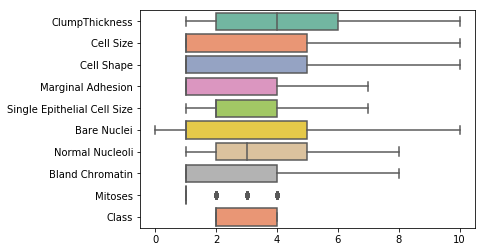

In [486]:
ax = sns.boxplot(data = modCancer_df,orient='h',palette = "Set2")

In [487]:
# We could see most of the outliers are now removed.

# Q6 Create a covariance matrix for identifying Principal components

In [488]:
# PCA
# Step 1 - Create covariance matrix
updated_df = modCancer_df.drop('Class',axis=1)

In [489]:
X_std = StandardScaler().fit_transform(updated_df)

In [490]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00144928 0.64427196 0.65469961 0.51812642 0.54679763 0.59099402
  0.57705657 0.54916006 0.40851625]
 [0.64427196 1.00144928 0.90673173 0.73886188 0.78187347 0.68365726
  0.75038188 0.73237774 0.50734086]
 [0.65469961 0.90673173 1.00144928 0.7132056  0.75174621 0.70242281
  0.73390042 0.72786954 0.47845161]
 [0.51812642 0.73886188 0.7132056  1.00144928 0.67219007 0.69621243
  0.69120839 0.64103205 0.46124786]
 [0.54679763 0.78187347 0.75174621 0.67219007 1.00144928 0.62547159
  0.65758455 0.69007149 0.50344973]
 [0.59099402 0.68365726 0.70242281 0.69621243 0.62547159 1.00144928
  0.68226408 0.59846847 0.43537156]
 [0.57705657 0.75038188 0.73390042 0.69120839 0.65758455 0.68226408
  1.00144928 0.68187494 0.40204479]
 [0.54916006 0.73237774 0.72786954 0.64103205 0.69007149 0.59846847
  0.68187494 1.00144928 0.48210264]
 [0.40851625 0.50734086 0.47845161 0.46124786 0.50344973 0.43537156
  0.40204479 0.48210264 1.00144928]]


# Q7 Identify eigen values and eigen vector

In [491]:
# Step 2- Get eigen values and eigen vector

In [492]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [493]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.29962814  0.08564529 -0.88770354 -0.00610111  0.10930851 -0.21396842
   0.23819129  0.01908706 -0.00168057]
 [-0.37370441  0.07123364  0.06360531 -0.73772534  0.22249714  0.35312012
  -0.08312311  0.23450484 -0.2662437 ]
 [-0.36969942  0.11566648  0.00169466  0.6610625   0.20798409  0.52071063
  -0.12485488  0.15017812 -0.24575995]
 [-0.33848688  0.08341736  0.29897849  0.05968223 -0.42258727 -0.12758818
   0.72017766  0.22597604 -0.14470071]
 [-0.34385913 -0.05472046  0.23762117  0.07093067  0.29454676 -0.61016317
  -0.18580719 -0.32743597 -0.4652699 ]
 [-0.33111804  0.15259196 -0.09209333 -0.07889728 -0.65551917  0.18375519
  -0.30715072 -0.5424904   0.0161809 ]
 [-0.3417794   0.24633727  0.10489891  0.04967208 -0.10516088 -0.34563439
  -0.4267198   0.51869097  0.4768455 ]
 [-0.33640363 -0.01973007  0.19895381 -0.02670081  0.41003508  0.12465115
   0.28719226 -0.42715355  0.63050895]
 [-0.24790754 -0.93803172 -0.05490335  0.02687581 -0.14511561  0.03223804
  -0

# Q8 Find variance and cumulative variance by each eigen vector

In [494]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
print("variance",var_exp)

Cumulative Variance Explained [ 67.58596729  75.22726585  81.09069254  86.05288671  89.84204063
  93.05262785  96.15871177  99.00214686 100.        ]
variance [67.58596728563776, 7.641298568294662, 5.863426683994115, 4.962194173861155, 3.7891539135022483, 3.210587226094703, 3.1060839177232578, 2.843435092987681, 0.9978531379044333]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

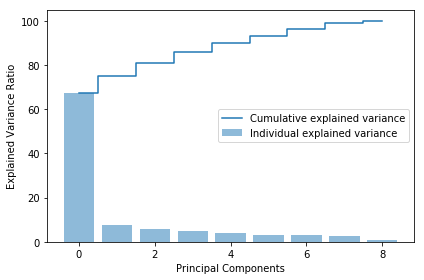

In [495]:
plt.figure(figsize=(6 , 4))
plt.bar(range(9), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(9), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [496]:
print('number of principle components taken:',5)

number of principle components taken: 5


In [497]:
X_reduced = PCA(n_components=5).fit_transform(updated_df)

In [498]:
xs = X_reduced[:,0]
ys = X_reduced[:,1]
zs = X_reduced[:,2]
ws = X_reduced[:,3]
vs = X_reduced[:,4]

# Q10 Find correlation between components and features

In [499]:
X_reduced

array([[-4.12704836,  0.21376343, -1.97247709, -0.35535021, -0.72268482],
       [ 5.2147564 , -4.77194779,  0.94926178,  1.19961849,  0.05334812],
       [-4.2979271 , -0.76296335, -0.04379926, -0.17080244, -0.24055658],
       ...,
       [ 9.80425755,  6.76168545,  2.85080403,  0.51529258,  1.48253616],
       [ 5.8385033 ,  2.9005356 ,  2.59701057,  0.02097078, -0.40870961],
       [ 6.98812381,  2.08284141,  2.73187825,  2.46034881, -0.72361557]])

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [55]:

joke_df = pd.read_csv('jokes.csv')

# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [56]:
joke_df.shape

(24983, 101)

In [57]:
ratings = joke_df.iloc[0:200,1:]

In [58]:
ratings.shape

(200, 100)

# Q13 Change the column indices from 0 to 99

In [59]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [60]:
ratings.columns

Index(['Joke1', 'Joke2', 'Joke3', 'Joke4', 'Joke5', 'Joke6', 'Joke7', 'Joke8',
       'Joke9', 'Joke10', 'Joke11', 'Joke12', 'Joke13', 'Joke14', 'Joke15',
       'Joke16', 'Joke17', 'Joke18', 'Joke19', 'Joke20', 'Joke21', 'Joke22',
       'Joke23', 'Joke24', 'Joke25', 'Joke26', 'Joke27', 'Joke28', 'Joke29',
       'Joke30', 'Joke31', 'Joke32', 'Joke33', 'Joke34', 'Joke35', 'Joke36',
       'Joke37', 'Joke38', 'Joke39', 'Joke40', 'Joke41', 'Joke42', 'Joke43',
       'Joke44', 'Joke45', 'Joke46', 'Joke47', 'Joke48', 'Joke49', 'Joke50',
       'Joke51', 'Joke52', 'Joke53', 'Joke54', 'Joke55', 'Joke56', 'Joke57',
       'Joke58', 'Joke59', 'Joke60', 'Joke61', 'Joke62', 'Joke63', 'Joke64',
       'Joke65', 'Joke66', 'Joke67', 'Joke68', 'Joke69', 'Joke70', 'Joke71',
       'Joke72', 'Joke73', 'Joke74', 'Joke75', 'Joke76', 'Joke77', 'Joke78',
       'Joke79', 'Joke80', 'Joke81', 'Joke82', 'Joke83', 'Joke84', 'Joke85',
       'Joke86', 'Joke87', 'Joke88', 'Joke89', 'Joke90', 'Joke91', 'Joke92'

In [61]:
var = 0
for columns in ratings.columns:
    ratings.rename(columns={columns:var},inplace=True)
    var=var+1
    

In [62]:
ratings

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [63]:
ratings = ratings.replace(99.00,0.00)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [64]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


In [65]:
sc = StandardScaler()
rat_df = sc.fit_transform(ratings)
ratings_diff = pd.DataFrame(rat_df)

### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [66]:
ratings_diff.columns

RangeIndex(start=0, stop=100, step=1)

In [67]:
ratings_diff.mean(axis=0)


0    -1.110223e-17
1    -9.658940e-17
2    -4.107825e-17
3     3.719247e-17
4    -8.881784e-18
5    -2.636780e-18
6    -1.665335e-18
7     2.331468e-17
8    -4.329870e-17
9    -2.553513e-17
10   -4.551914e-17
11   -8.604228e-17
12    6.661338e-17
13    5.467848e-17
14   -2.164935e-17
15   -1.065814e-16
16    1.637579e-17
17    2.331468e-17
18   -9.159340e-18
19    2.997602e-17
20    1.065814e-16
21    1.720846e-17
22   -2.775558e-17
23    4.329870e-17
24   -3.885781e-17
25   -1.498801e-17
26   -3.996803e-17
27   -9.436896e-18
28   -5.273559e-17
29    1.998401e-17
30   -9.992007e-18
31   -1.032507e-16
32    1.221245e-17
33   -1.221245e-17
34   -7.549517e-17
35    3.247402e-17
36    3.858025e-17
37   -2.609024e-17
38   -2.386980e-17
39    1.276756e-17
40   -2.220446e-17
41    1.554312e-17
42    3.552714e-17
43   -6.328271e-17
44    1.637579e-17
45   -3.719247e-17
46   -3.108624e-17
47    7.771561e-17
48    5.551115e-19
49    7.494005e-17
50   -1.221245e-17
51   -1.554312e-17
52   -9.4368

In [68]:
df_ratings_diff = pd.DataFrame(ratings_diff.mean(axis=0))

In [70]:
df_ratings_diff.nlargest(10,[0])

,0
98,1.840889e-16
81,1.243450e-16
97,1.198694e-16
20,1.065814e-16
94,1.054712e-16
92,8.770762e-17
47,7.771561e-17
73,7.743806e-17
99,7.549517e-17
49,7.494005e-17
